In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [2]:
# Setting plot size
plt.rcParams['figure.figsize'] = (20, 8)



In [3]:
# Load the dataset
df = pd.read_csv('Data/AAPL.csv')
df = df.loc[10100:10467]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


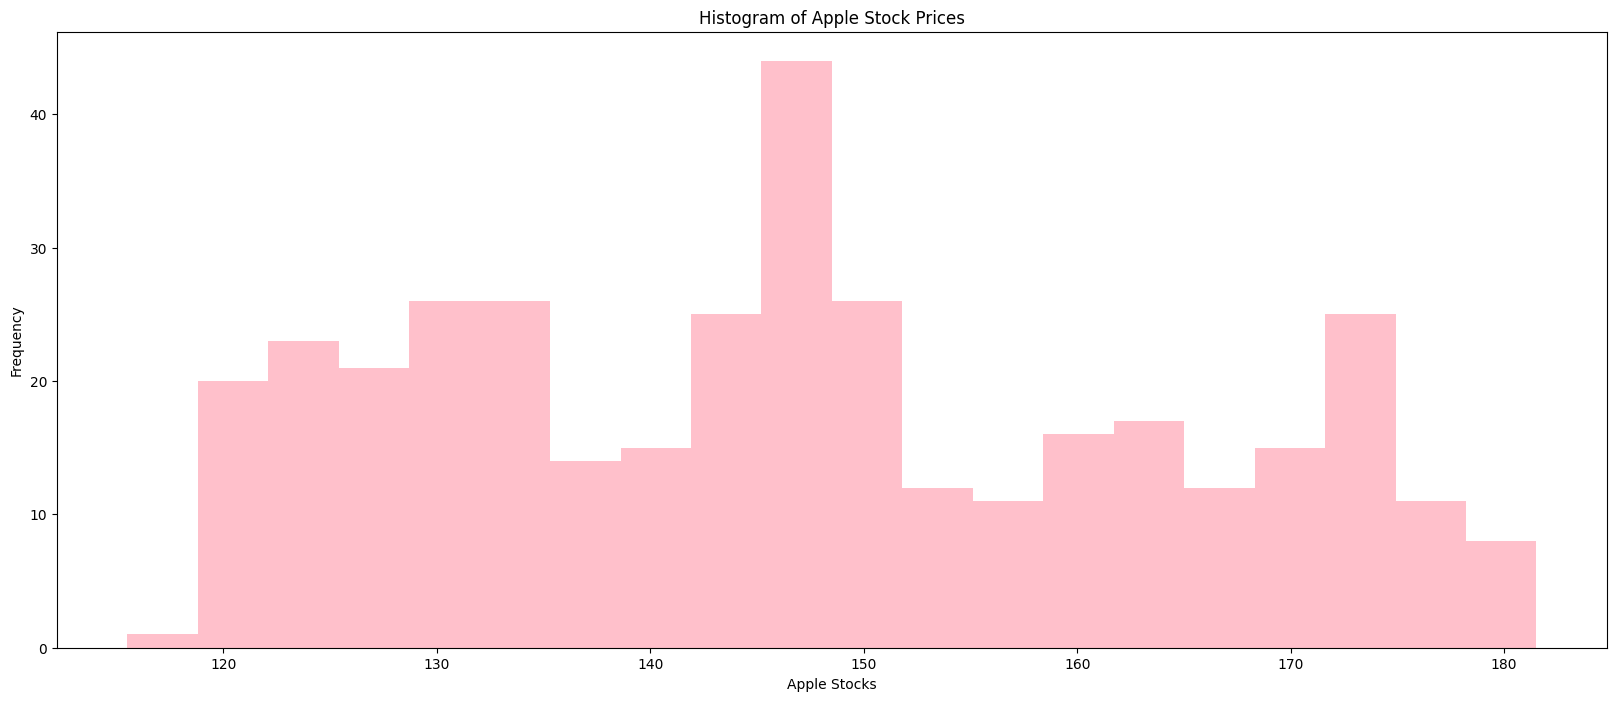

In [4]:

# Plotting Histogram
plt.hist(df['Adj Close'], bins=20, color='pink')
plt.title('Histogram of Apple Stock Prices')
plt.xlabel('Apple Stocks')
plt.ylabel('Frequency')
plt.show()



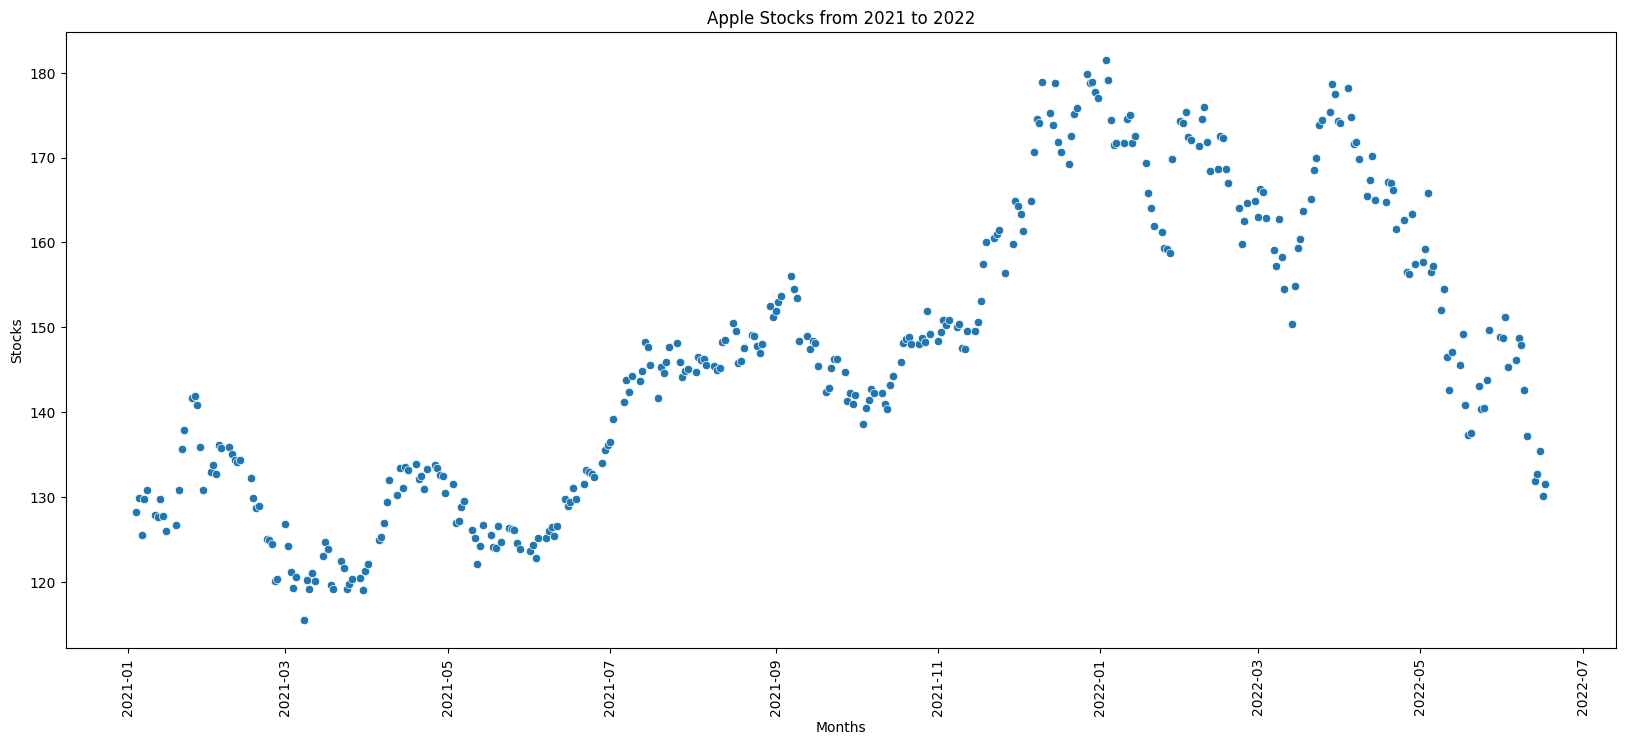

In [5]:
# Plotting Scatter Plot
plt.figure(figsize=(20, 8))
sns.scatterplot(df['Adj Close'])
plt.title('Apple Stocks from 2021 to 2022')
plt.ylabel('Stocks')
plt.xlabel('Months')
plt.xticks(rotation=90)
plt.show()



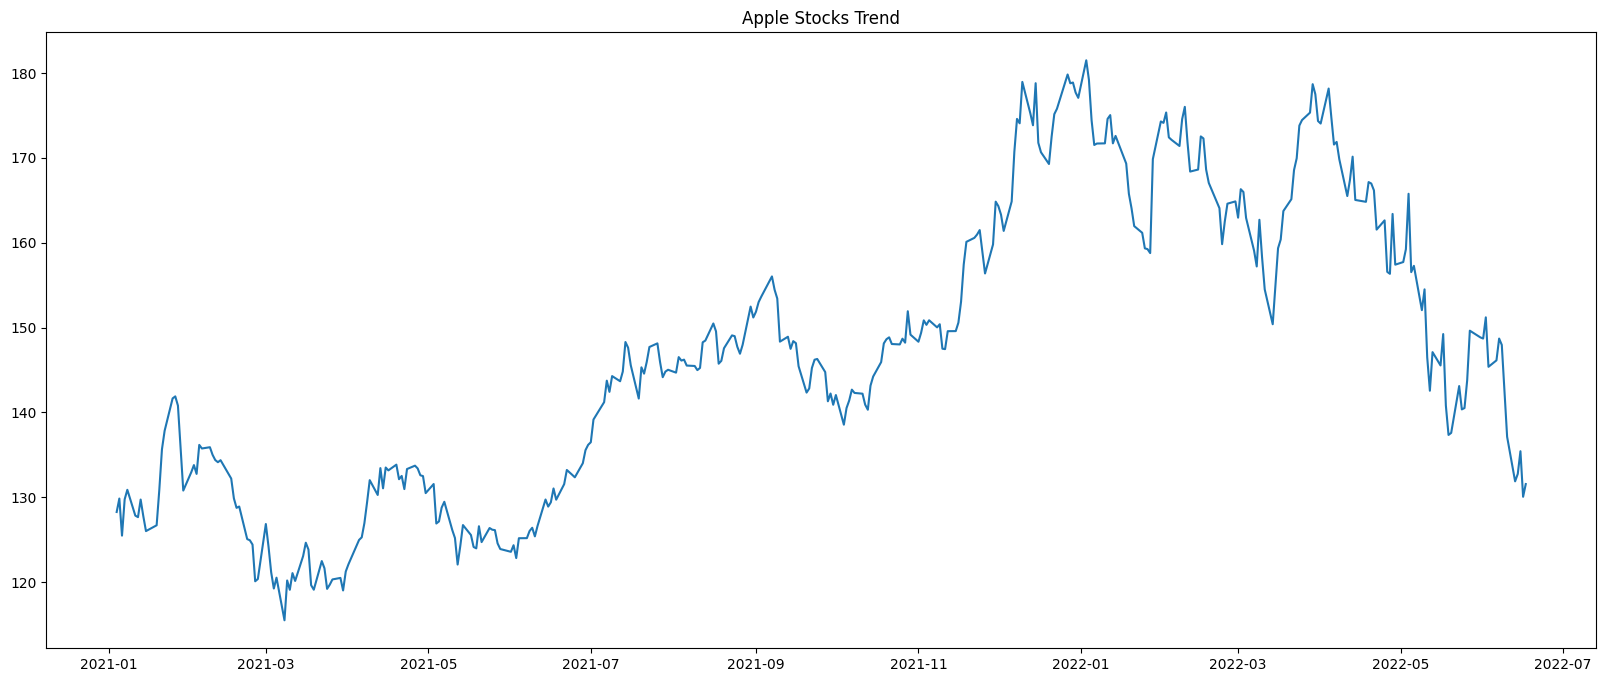

In [6]:
# Plotting Time Series Trend
plt.plot(df['Adj Close'])
plt.title('Apple Stocks Trend')
plt.show()


In [7]:

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Adj Close']])



In [8]:
# Creating a dataset with X as the past 60 days stock price and Y as the next day stock price
X, Y = [], []
for i in range(60, len(df)):
    X.append(df_scaled[i-60:i, 0])
    Y.append(df_scaled[i, 0])
X, Y = np.array(X), np.array(Y)



In [9]:
# Reshape the data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [10]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))



In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:

# Fit the model to the training data
model.fit(X, Y, epochs=25, batch_size=32)



Epoch 1/25
10/10 [==============================] - 2s 25ms/step - loss: 0.1204
Epoch 2/25
10/10 [==============================] - 0s 25ms/step - loss: 0.0245
Epoch 3/25
10/10 [==============================] - 0s 24ms/step - loss: 0.0175
Epoch 4/25
10/10 [==============================] - 0s 29ms/step - loss: 0.0132
Epoch 5/25
10/10 [==============================] - 0s 23ms/step - loss: 0.0125
Epoch 6/25
10/10 [==============================] - 0s 22ms/step - loss: 0.0113
Epoch 7/25
10/10 [==============================] - 0s 23ms/step - loss: 0.0111
Epoch 8/25
10/10 [==============================] - 0s 23ms/step - loss: 0.0105
Epoch 9/25
10/10 [==============================] - 0s 23ms/step - loss: 0.0099
Epoch 10/25
10/10 [==============================] - 0s 24ms/step - loss: 0.0098
Epoch 11/25
10/10 [==============================] - 0s 24ms/step - loss: 0.0096
Epoch 12/25
10/10 [==============================] - 0s 24ms/step - loss: 0.0093
Epoch 13/25
10/10 [==================

In [13]:
# Predictions
inputs = df_scaled[len(df_scaled) - 60:]
inputs = np.reshape(inputs, (1, 60, 1))
predicted_stock_price = model.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 471ms/step


In [14]:

# Generate dates for the predicted values
predicted_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=len(predicted_stock_price), freq='B')


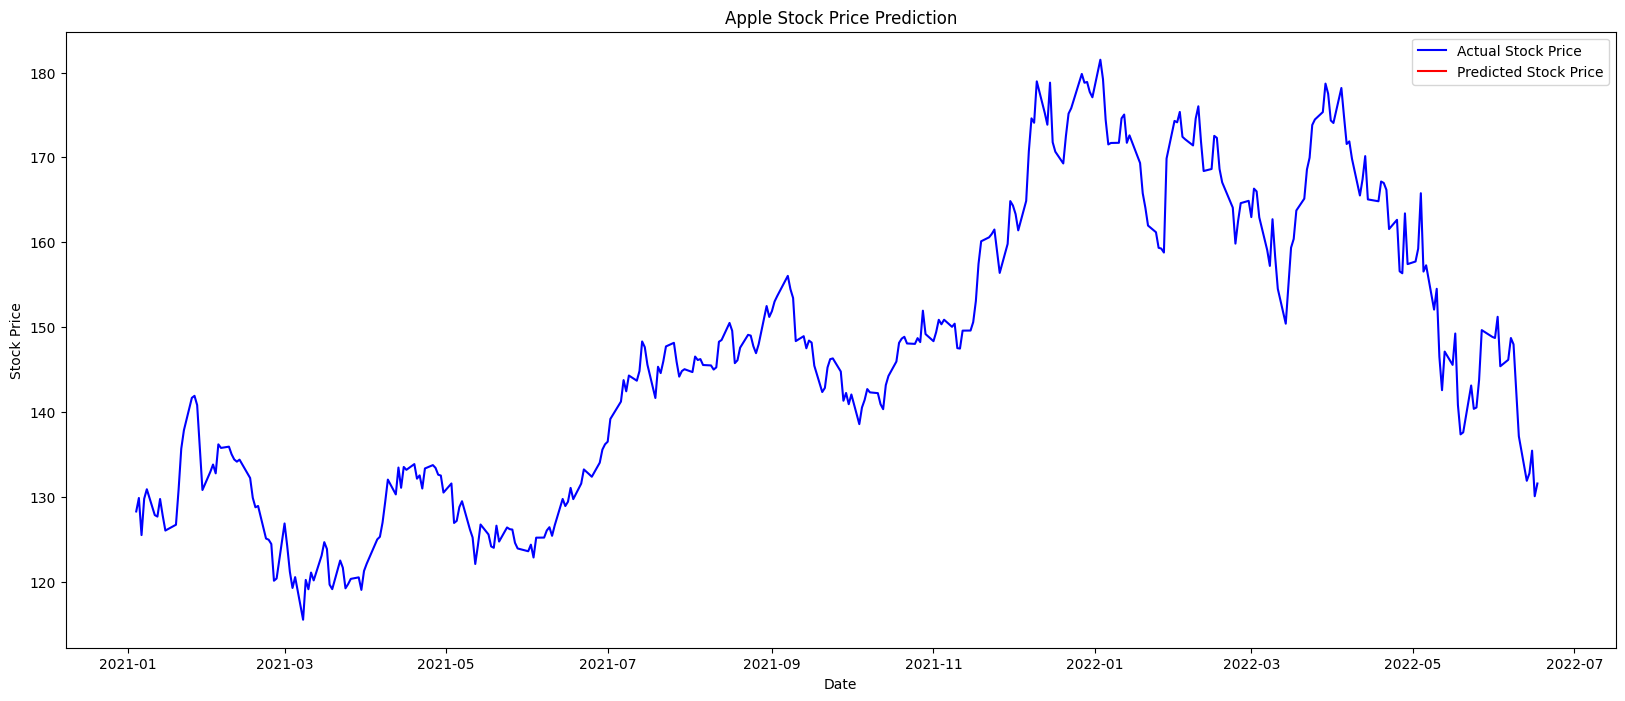

In [15]:

# Plotting the results
plt.plot(df.index, df['Adj Close'], label='Actual Stock Price', color='blue')
plt.plot(predicted_dates, predicted_stock_price[0], label='Predicted Stock Price', color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()